# Started by importing our resources for our project

In [75]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import hvplot.pandas

# Loaded the environment

In [76]:
# Load .env environment variables
load_dotenv()

True

# Set Alpaca Key and Secret Key from .env file

In [77]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Set variables for the exchange and url to import data from the Alpaca Crypto API

In [78]:
# Create the Alpaca API object
exchanges = 'FTXU'

url = 'https://data.alpaca.markets/v1beta1/crypto'

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url = url
    )

# Set the date that we wanted to start importing data

In [79]:
# Data start date
start =  pd.Timestamp("2021-01-01", tz="America/New_York").isoformat()

# Created a list of the Crypto tokens for our portfolio

In [80]:
#created crypto portfolio using ten tokens
crypto_performers=['BTCUSD','ETHUSD','LTCUSD','DOGEUSD','GRTUSD','SOLUSD','SUSHIUSD','UNIUSD','TRXUSD','LINKUSD']

# The timeframe that we wanted to draw our data

In [81]:
# Set timeframe
timeframe = '1Day'

# Created the Crypto portfolio dataframe using our previously set variables

In [82]:
#create initial dataframe from the Alpaca API
crypto_portfolio_df = alpaca.get_crypto_bars(
    symbol = crypto_performers,
    exchanges = exchanges,
    timeframe = timeframe,
    start = start
).df

display(crypto_portfolio_df.head())

,exchange,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,,
2021-01-01 06:00:00+00:00,FTXU,29225.0,29631.0,28750.0,29631.0,25.0765,211,29330.826766,BTCUSD
2021-01-02 06:00:00+00:00,FTXU,29585.0,34172.5,29566.5,33666.5,237.1624,1742,32113.173543,BTCUSD
2021-01-03 06:00:00+00:00,FTXU,33791.5,34820.5,32335.0,32919.0,291.5192,2155,33900.455198,BTCUSD
2021-01-04 06:00:00+00:00,FTXU,33013.0,33448.5,27794.0,30464.5,642.7430,2501,30211.437917,BTCUSD
2021-01-05 06:00:00+00:00,FTXU,30493.0,35878.5,29900.0,34863.0,999.8224,1378,32039.850844,BTCUSD


# Wanted to see the closing prices of our Crypto portfolio over the course of six months starting from June 1, 2021 to December 31, 2021
## Started to slice the data to get the closing prices, symbols and timestamp into a dataframe over the course of six months

In [83]:
# Drop the following columns 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'
columns=['exchange','open', 'high', 'low', 'volume', 'trade_count', 'vwap']
crypto_api_df = crypto_portfolio_df.drop(columns, axis = 1)
crypto_api_df.head()

,close,symbol
timestamp,,
2021-01-01 06:00:00+00:00,29631.0,BTCUSD
2021-01-02 06:00:00+00:00,33666.5,BTCUSD
2021-01-03 06:00:00+00:00,32919.0,BTCUSD
2021-01-04 06:00:00+00:00,30464.5,BTCUSD
2021-01-05 06:00:00+00:00,34863.0,BTCUSD


# Pulled the closing prices for our Crypto portfolio for each token for June 1, 2021 so we could create a plot of the portfolio on the initial day of investment

In [84]:
#found data in the crypto portfolio from 6/1/2021
crypto_performers_start_df = crypto_api_df.loc['2021-06-01']
crypto_performers_start_df.reset_index(inplace=True)

display(crypto_performers_start_df)

,timestamp,close,symbol
0,2021-06-01 05:00:00+00:00,36702.00000,BTCUSD
1,2021-06-01 05:00:00+00:00,0.37085,DOGEUSD
2,2021-06-01 05:00:00+00:00,2626.50000,ETHUSD
3,2021-06-01 05:00:00+00:00,0.75915,GRTUSD
4,2021-06-01 05:00:00+00:00,30.48400,LINKUSD
5,2021-06-01 05:00:00+00:00,182.65500,LTCUSD
6,2021-06-01 05:00:00+00:00,31.05500,SOLUSD
7,2021-06-01 05:00:00+00:00,11.99290,SUSHIUSD
8,2021-06-01 05:00:00+00:00,0.07652,TRXUSD
9,2021-06-01 05:00:00+00:00,27.29400,UNIUSD


# Rearranged the dataframe using a pivot table so we could plot the data

In [85]:
#setup crypto df for 6/1/2021 using pivot table then plotted the df
crypto_pivot_start= crypto_performers_start_df.pivot_table(values="close", index="timestamp", columns="symbol")

crypto_plot_start = crypto_pivot_start.hvplot.bar(
    xlabel='Symbols',
    ylabel='Closing Value',
    title= 'Crypto Closing Values on 6/1/2021',
    rot=90
)
crypto_plot_start

:Bars   [timestamp,symbol]   (value)

# Pulled the closing prices for our Crypto portfolio for each token for December 31, 2021 so we could create a plot of the portfolio for the end of the year

In [86]:
#found data in the crypto portfolio from 12/31/2021
crypto_performers_end_df = crypto_api_df.loc['2021-12-31']
crypto_performers_end_df.reset_index(inplace=True)
crypto_performers_end_df

,timestamp,close,symbol
0,2021-12-31 06:00:00+00:00,47185.000000,BTCUSD
1,2021-12-31 06:00:00+00:00,0.171764,DOGEUSD
2,2021-12-31 06:00:00+00:00,3729.100000,ETHUSD
3,2021-12-31 06:00:00+00:00,0.648700,GRTUSD
4,2021-12-31 06:00:00+00:00,19.833500,LINKUSD
5,2021-12-31 06:00:00+00:00,148.035000,LTCUSD
6,2021-12-31 06:00:00+00:00,173.175000,SOLUSD
7,2021-12-31 06:00:00+00:00,9.413800,SUSHIUSD
8,2021-12-31 06:00:00+00:00,0.076073,TRXUSD
9,2021-12-31 06:00:00+00:00,17.298000,UNIUSD


# Rearranged the dataframe using a pivot table so we could plot the data

In [87]:
#setup crypto df for 12/31/2021 using pivot table then plotted the df
crypto_pivot_end= crypto_performers_end_df.pivot_table(values="close", index="timestamp", columns="symbol")
crypto_plot_end = crypto_pivot_end.hvplot.bar(
    xlabel='Symbols',
    ylabel='Closing Value',
    title='Crypto Closing Values on 12/31/2021',
    rot=90 
)
crypto_plot_end

:Bars   [timestamp,symbol]   (value)

# Plotted the two dataframes for a side by side comparison

In [88]:
#plotted chart side by side for comparison
crypto_pivot_start.hvplot.bar(
    xlabel='Symbols',
    ylabel='Closing Value',
    title='Crypto Portfolio Intial Day vs End of Year',
    rot=90
)*crypto_pivot_end.hvplot.bar()

:Overlay
   .Bars.I  :Bars   [timestamp,symbol]   (value)
   .Bars.II :Bars   [timestamp,symbol]   (value)

# Wanted to see the change of the closing price for our Crypto portfolio over the course of six months
* Used .loc to pull the information needed between the date range of six months
* Displayed the dataframe

In [89]:
# create df containing info from '2021-06-01' through '2021-03-31'
crypto_timeframe = crypto_api_df.loc['2021-06-01':'2021-12-31']
crypto_timeframe.reset_index(inplace=True)

crypto_timeframe.head()

C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



,timestamp,close,symbol
0,2021-06-01 05:00:00+00:00,36702.0,BTCUSD
1,2021-06-02 05:00:00+00:00,37950.0,BTCUSD
2,2021-06-03 05:00:00+00:00,37621.0,BTCUSD
3,2021-06-04 05:00:00+00:00,37661.0,BTCUSD
4,2021-06-05 05:00:00+00:00,35995.0,BTCUSD


# Rearranged the dataframe using a pivot table so we could plot the data

In [90]:
# create a pivot table to plot the close over time then plotted the df
crypto_timeframe = crypto_timeframe.pivot_table(values="close", index="timestamp", columns="symbol")

crypto_timeframe.hvplot(
    xlabel='DATE',
    ylabel='Closing Price',
    title='Closing Prices Crypto Portfolio 6/1/2021 - 12/31/2021',
    figsize=[20,10]
)

:NdOverlay   [symbol]
   :Curve   [timestamp]   (value)

# Set our intial invest price of 10,000 dollars and calculated the value per share using the closing price
* Our initial investment was evenly distributed across the Crypto portfolio
* Set the data we found into columns and displayed the new dataframe

In [91]:
#create columns for shares and calculate value on 6/1/2021 then displayed the df
initial_investment = 10000

crypto_performers_start_df['shares']=(0.10*initial_investment)
crypto_performers_start_df['shares']=(0.10*initial_investment/crypto_performers_start_df['close'])

crypto_performers_start_df['values']=crypto_performers_start_df['shares'] * crypto_performers_start_df['close']

#display df
crypto_performers_start_df

C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,timestamp,close,symbol,shares,values
0,2021-06-01 05:00:00+00:00,36702.00000,BTCUSD,0.027246,1000.0
1,2021-06-01 05:00:00+00:00,0.37085,DOGEUSD,2696.508022,1000.0
2,2021-06-01 05:00:00+00:00,2626.50000,ETHUSD,0.380735,1000.0
3,2021-06-01 05:00:00+00:00,0.75915,GRTUSD,1317.262728,1000.0
4,2021-06-01 05:00:00+00:00,30.48400,LINKUSD,32.804094,1000.0
5,2021-06-01 05:00:00+00:00,182.65500,LTCUSD,5.474802,1000.0
6,2021-06-01 05:00:00+00:00,31.05500,SOLUSD,32.200934,1000.0
7,2021-06-01 05:00:00+00:00,11.99290,SUSHIUSD,83.382668,1000.0
8,2021-06-01 05:00:00+00:00,0.07652,TRXUSD,13068.478829,1000.0
9,2021-06-01 05:00:00+00:00,27.29400,UNIUSD,36.638089,1000.0


# Found the sum of our initial investment 

In [92]:
#display sum of value of crypto portfolio on June 1, 2021 
sum_crypto_portfolio_start = crypto_performers_start_df['values'].sum()

print(f'The total value of the crypto portfolio on June 1, 2021 was {sum_crypto_portfolio_start}')

The total value of the crypto portfolio on June 1, 2021 was 10000.0


# Dropped the close and shares columns from our dataframe, rearranged the dataframe using a pivot table, and displayed the new dataframe

In [93]:
#setup df to plot value and symbol using pivot table
columns=['close','shares']
crypto_values_start = crypto_performers_start_df.drop(columns,axis=1)
crypto_values_start = crypto_values_start.pivot_table(values="values", index="timestamp", columns="symbol")

#display df
crypto_values_start

symbol,BTCUSD,DOGEUSD,ETHUSD,GRTUSD,LINKUSD,LTCUSD,SOLUSD,SUSHIUSD,TRXUSD,UNIUSD
timestamp,,,,,,,,,,
2021-06-01 05:00:00+00:00,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0


# Plotted the value of our initial investment so we could compare it to the end of the year

In [94]:
#plot
crypto_values_start.hvplot.bar(
    xlabel='Symbols',
    ylabel='Values',
    title='Value of Crypto Portfolio on 6/1/2021'
)

:Bars   [timestamp,symbol]   (value)

# Calculated the value per share at the end of the year for the Crypto portfolio, set the data into columns, and then displayed the dataframe

In [95]:
#create columns for shares and calculate value on 12/31/2021 then display df
crypto_performers_end_df['shares'] = crypto_performers_start_df['shares']
crypto_performers_end_df['values']=crypto_performers_end_df['shares'] * crypto_performers_end_df['close']

#display df
crypto_performers_end_df

C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,timestamp,close,symbol,shares,values
0,2021-12-31 06:00:00+00:00,47185.000000,BTCUSD,0.027246,1285.624762
1,2021-12-31 06:00:00+00:00,0.171764,DOGEUSD,2696.508022,463.164352
2,2021-12-31 06:00:00+00:00,3729.100000,ETHUSD,0.380735,1419.798211
3,2021-12-31 06:00:00+00:00,0.648700,GRTUSD,1317.262728,854.508332
4,2021-12-31 06:00:00+00:00,19.833500,LINKUSD,32.804094,650.619997
5,2021-12-31 06:00:00+00:00,148.035000,LTCUSD,5.474802,810.462347
6,2021-12-31 06:00:00+00:00,173.175000,SOLUSD,32.200934,5576.396716
7,2021-12-31 06:00:00+00:00,9.413800,SUSHIUSD,83.382668,784.947761
8,2021-12-31 06:00:00+00:00,0.076073,TRXUSD,13068.478829,994.151856
9,2021-12-31 06:00:00+00:00,17.298000,UNIUSD,36.638089,633.765663


# Found the sum of our invest at the end of the year

In [96]:
#display sum of value of crypto portfolio on December 31, 2021 
sum_crypto_portfolio_end= crypto_performers_end_df['values'].sum()

print(f'The total value of the crypto portfolio on December 31, 2021 was {sum_crypto_portfolio_end}')

The total value of the crypto portfolio on December 31, 2021 was 13473.439995184039


# Dropped the close and shares columns from our dataframe, rearranged the dataframe using a pivot table, and displayed the new dataframe

In [97]:
#setup df to plot value and symbol using pivot table
columns=['close','shares']
crypto_values_end = crypto_performers_end_df.drop(columns,axis=1)
crypto_values_end = crypto_values_end.pivot_table(values="values", index="timestamp", columns="symbol")

#display values df
crypto_values_end

symbol,BTCUSD,DOGEUSD,ETHUSD,GRTUSD,LINKUSD,LTCUSD,SOLUSD,SUSHIUSD,TRXUSD,UNIUSD
timestamp,,,,,,,,,,
2021-12-31 06:00:00+00:00,1285.624762,463.164352,1419.798211,854.508332,650.619997,810.462347,5576.396716,784.947761,994.151856,633.765663


# Plotted the value of our investment at the end of the year so we could compare it to the intial day of investment

In [98]:
#plot crypto portfolio value on 12/31/2021
crypto_values_end.hvplot.bar(
    xlabel='Symbols',
    ylabel='Values',
    title='Value of Crypto Portfolio on 12/31/2021'
)

:Bars   [timestamp,symbol]   (value)

# Plotted the two dataframes for a side by side comparison

In [99]:
#plotted charts side by side for comparison
crypto_values_start.hvplot.bar(
    xlabel='Symbols',
    ylabel='Values',
    rot=90,
    title='Crypto Portfolio'
)*crypto_values_end.hvplot.bar()

:Overlay
   .Bars.I  :Bars   [timestamp,symbol]   (value)
   .Bars.II :Bars   [timestamp,symbol]   (value)

# Found the total change of our investment over six months

In [100]:
#find change in crypto portfolio after six months

crypto_portfolio_total =sum_crypto_portfolio_end-sum_crypto_portfolio_start

print(f'The total of the crypto portfolio after six months = {crypto_portfolio_total}')

The total of the crypto portfolio after six months = 3473.4399951840387


# Wanted to find the percent change over over time of the Crypto portfolio
* Had difficulty creating a dataframe to work with so had to pull the data for each token individually
* Created individual dataframes for each token set symbols as keys and dropped the symbol column

In [101]:
#create a df to calculate daily change
#'BTCUSD','ETHUSD','LTCUSD','DOGEUSD','GRTUSD','SOLUSD','SUSHIUSD','UNIUSD','TRXUSD','LINKUSD'
BTCUSD = crypto_portfolio_df[crypto_portfolio_df['symbol']=='BTCUSD'].drop('symbol', axis=1)
ETHUSD = crypto_portfolio_df[crypto_portfolio_df['symbol']=='ETHUSD'].drop('symbol', axis=1)
LTCUSD = crypto_portfolio_df[crypto_portfolio_df['symbol']=='LTCUSD'].drop('symbol', axis=1)
DOGEUSD = crypto_portfolio_df[crypto_portfolio_df['symbol']=='DOGEUSD'].drop('symbol', axis=1)
GRTUSD = crypto_portfolio_df[crypto_portfolio_df['symbol']=='GRTUSD'].drop('symbol', axis=1)
SOLUSD = crypto_portfolio_df[crypto_portfolio_df['symbol']=='SOLUSD'].drop('symbol', axis=1)
SUSHIUSD = crypto_portfolio_df[crypto_portfolio_df['symbol']=='SUSHIUSD'].drop('symbol', axis=1)
UNIUSD = crypto_portfolio_df[crypto_portfolio_df['symbol']=='UNIUSD'].drop('symbol', axis=1)
TRXUSD = crypto_portfolio_df[crypto_portfolio_df['symbol']=='TRXUSD'].drop('symbol', axis=1)
LINKUSD = crypto_portfolio_df[crypto_portfolio_df['symbol']=='LINKUSD'].drop('symbol', axis=1)

# combined the individual dataframes for the tokens and labeled the keys

In [102]:

df_crypto_portfolio = pd.concat([BTCUSD,ETHUSD,LTCUSD,DOGEUSD,GRTUSD,SOLUSD,SUSHIUSD,UNIUSD,TRXUSD,LINKUSD], axis=1, keys=['BTCUSD','ETHUSD','LTCUSD','DOGEUSD','GRTUSD','SOLUSD','SUSHIUSD','UNIUSD','TRXUSD','LINKUSD'])
df_crypto_portfolio.head()

BTCUSD                                      \
                          exchange     open     high      low    close   
timestamp                                                                
2021-01-01 06:00:00+00:00     FTXU  29225.0  29631.0  28750.0  29631.0   
2021-01-02 06:00:00+00:00     FTXU  29585.0  34172.5  29566.5  33666.5   
2021-01-03 06:00:00+00:00     FTXU  33791.5  34820.5  32335.0  32919.0   
2021-01-04 06:00:00+00:00     FTXU  33013.0  33448.5  27794.0  30464.5   
2021-01-05 06:00:00+00:00     FTXU  30493.0  35878.5  29900.0  34863.0   

                                                                ETHUSD  \
                             volume trade_count          vwap exchange   
timestamp                                                                
2021-01-01 06:00:00+00:00   25.0765         211  29330.826766     FTXU   
2021-01-02 06:00:00+00:00  237.1624        1742  32113.173543     FTXU   
2021-01-03 06:00:00+00:00  291.5192        2155  33900.455198     FTXU   
2021-01-04 06:00:00+00:00  642.7430        2501  30211.437917     FTXU   
2021-01-05 06:00:00+00:00  999.8224        1378  32039.850844     FTXU   

                                    ...      TRXUSD       LINKUSD           \
                              open  ... trade_count vwap exchange     open   
timestamp                           ...                                      
2021-01-01 06:00:00+00:00   739.08  ...         NaN  NaN     FTXU  11.9900   
2021-01-02 06:00:00+00:00   736.30  ...         NaN  NaN     FTXU  11.6050   
2021-01-03 06:00:00+00:00   787.43  ...         NaN  NaN     FTXU  12.8565   
2021-01-04 06:00:00+00:00  1093.38  ...         NaN  NaN     FTXU  14.9810   
2021-01-05 06:00:00+00:00  1002.08  ...         NaN  NaN      NaN      NaN   

                                                                         \
                              high      low    close volume trade_count   
timestamp                                                                 
2021-01-01 06:00:00+00:00  11.9900  11.9480  11.9480    5.0         2.0   
2021-01-02 06:00:00+00:00  12.1095  11.6050  12.1095   20.7         2.0   
2021-01-03 06:00:00+00:00  13.1335  12.8565  13.1335   25.7         2.0   
2021-01-04 06:00:00+00:00  14.9810  12.9665  12.9665  124.6         3.0   
2021-01-05 06:00:00+00:00      NaN      NaN      NaN    NaN         NaN   

                                      
                                vwap  
timestamp                             
2021-01-01 06:00:00+00:00  11.981600  
2021-01-02 06:00:00+00:00  12.107063  
2021-01-03 06:00:00+00:00  12.912547  
2021-01-04 06:00:00+00:00  13.850893  
2021-01-05 06:00:00+00:00        NaN  

[5 rows x 80 columns]

# Created a dataframe of the daily returns over the course of six months

In [103]:
#create df to find daily returns
df_crypto_portfolio = df_crypto_portfolio.loc['2021-06-01':'2021-12-31']

df_crypto_portfolio.head()

BTCUSD                                      \
                          exchange     open     high      low    close   
timestamp                                                                
2021-06-01 05:00:00+00:00     FTXU  36740.0  37444.0  35536.0  36702.0   
2021-06-02 05:00:00+00:00     FTXU  36690.0  38217.0  36622.0  37950.0   
2021-06-03 05:00:00+00:00     FTXU  38032.0  39478.0  37387.0  37621.0   
2021-06-04 05:00:00+00:00     FTXU  37500.0  37844.0  35600.0  37661.0   
2021-06-05 05:00:00+00:00     FTXU  37690.0  37924.0  34761.0  35995.0   

                                                                ETHUSD  \
                             volume trade_count          vwap exchange   
timestamp                                                                
2021-06-01 05:00:00+00:00  860.6465        3411  36366.537984     FTXU   
2021-06-02 05:00:00+00:00  304.0149        1548  37505.478819     FTXU   
2021-06-03 05:00:00+00:00  250.1933        1345  38496.511503     FTXU   
2021-06-04 05:00:00+00:00  363.3660        2530  36726.258032     FTXU   
2021-06-05 05:00:00+00:00  402.9814        2714  36121.088683     FTXU   

                                   ...      TRXUSD            LINKUSD          \
                             open  ... trade_count      vwap exchange    open   
timestamp                          ...                                          
2021-06-01 05:00:00+00:00  2636.8  ...        62.0  0.075110     FTXU  30.574   
2021-06-02 05:00:00+00:00  2635.3  ...       157.0  0.077496     FTXU  30.593   
2021-06-03 05:00:00+00:00  2769.6  ...       216.0  0.079805     FTXU  31.210   
2021-06-04 05:00:00+00:00  2735.0  ...       104.0  0.076355     FTXU  29.795   
2021-06-05 05:00:00+00:00  2789.7  ...        84.0  0.076750     FTXU  29.516   

                                                                            \
                              high      low    close    volume trade_count   
timestamp                                                                    
2021-06-01 05:00:00+00:00  31.6655  28.8070  30.4840  115327.0      3121.0   
2021-06-02 05:00:00+00:00  32.1890  30.0340  31.1210   82766.1      5975.0   
2021-06-03 05:00:00+00:00  32.8410  27.1950  29.6755  110630.1      7912.0   
2021-06-04 05:00:00+00:00  29.8635  27.1705  29.5445   90755.6      6456.0   
2021-06-05 05:00:00+00:00  30.1550  26.0745  27.6400  112948.2      8477.0   

                                      
                                vwap  
timestamp                             
2021-06-01 05:00:00+00:00  30.191905  
2021-06-02 05:00:00+00:00  30.846957  
2021-06-03 05:00:00+00:00  31.580947  
2021-06-04 05:00:00+00:00  28.811946  
2021-06-05 05:00:00+00:00  27.499658  

[5 rows x 80 columns]

# Created an empty dataframe and filled it with the information needed to compute the percent change
* Dropped the time component 
* Displayed the dataframe

In [104]:
#create empty df for closing prices
df_closing_prices_crypto = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in crypto_performers:
    df_closing_prices_crypto[ticker] = df_crypto_portfolio[ticker]["close"]

# Drop the time component of the date
df_closing_prices_crypto.index = df_closing_prices_crypto.index.date

#display df
df_closing_prices_crypto.head()

,BTCUSD,ETHUSD,LTCUSD,DOGEUSD,GRTUSD,SOLUSD,SUSHIUSD,UNIUSD,TRXUSD,LINKUSD
2021-06-01,36702.0,2626.5,182.655,0.370850,0.75915,31.0550,11.9929,27.294,0.076520,30.4840
2021-06-02,37950.0,2766.9,189.125,0.427976,0.78635,35.3450,12.9986,28.130,0.078897,31.1210
2021-06-03,37621.0,2727.7,182.230,0.385888,0.84555,37.8800,12.4467,27.000,0.079235,29.6755
2021-06-04,37661.0,2787.9,182.925,0.384303,0.83490,41.9625,12.5337,27.379,0.078750,29.5445
2021-06-05,35995.0,2682.0,177.320,0.374430,0.77375,39.9200,11.7012,25.912,0.076522,27.6400


# Calculated the percent change and displayed the dataframe

In [105]:
# Compute daily returns
df_daily_returns_crypto = df_closing_prices_crypto.pct_change().dropna()

# Display sample data
df_daily_returns_crypto.head()

,BTCUSD,ETHUSD,LTCUSD,DOGEUSD,GRTUSD,SOLUSD,SUSHIUSD,UNIUSD,TRXUSD,LINKUSD
2021-06-02,0.034004,0.053455,0.035422,0.154041,0.035830,0.138142,0.083858,0.030629,0.031070,0.020896
2021-06-03,-0.008669,-0.014167,-0.036457,-0.098342,0.075285,0.071722,-0.042458,-0.040171,0.004278,-0.046448
2021-06-04,0.001063,0.022070,0.003814,-0.004107,-0.012595,0.107775,0.006990,0.014037,-0.006121,-0.004414
2021-06-05,-0.044237,-0.037986,-0.030641,-0.025691,-0.073242,-0.048674,-0.066421,-0.053581,-0.028286,-0.064462
2021-06-06,0.008529,0.031916,0.013366,-0.002357,0.046850,0.068512,-0.011802,0.016981,0.022902,0.018705


# Plotted the daily returns dataframe for the Crypto portfolio in different ways to see which would represent the data best

In [106]:
#plot daily return of crypto portfolio
df_daily_returns_crypto.hvplot(
    xlabel='DATE',
    ylabel='Daily Return',
    title='The Daily Returns of Crypto Portfolio 6/1/2021 - 12/31/2021',
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

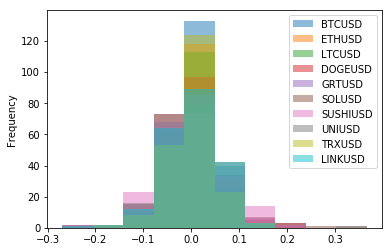

In [107]:
# Visualize the distribution of daily returns across all cryptos using a histogram plot
df_daily_returns_crypto.plot.hist(alpha=0.5)

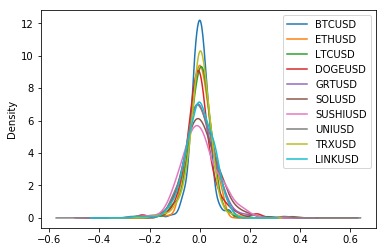

In [108]:
# Visualize the distribution of daily returns across all stocks using a density plot
df_daily_returns_crypto.plot.density()

# Took the coding that was done the Crypto portfolio and used for the Nasdaq portfolio to gather information and create visual comparisons between the two portfolios

In [109]:
# Initial 
import os
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import datetime as dt
#import chart_studio.plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
#import cufflinks as cf
import alpaca_trade_api as tradeapi
import hvplot.pandas
%matplotlib inline
#cf.go_offline()

In [110]:
load_dotenv()

True

In [111]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [112]:
# Create the Alpaca API Object
alpaca = tradeapi.REST(
alpaca_api_key,
alpaca_secret_key,
api_version="v2"

)

In [113]:
# format current date as ISO format
start = pd.Timestamp("2021-01-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-12-31", tz="America/New_York").isoformat()


In [114]:
#create top 10 nasdaq stock tickers
Stock_top10_tickers = ['AAPL', 'AMZN','AMD','ABNB','ALGN','AEP','ADI','ANSS','AMAT','ASML']


In [115]:
# Set timeframe to one day ("1Day") for the Alpaca API
timeframe = "1Day"


In [116]:
# Get current closing prices for tickers
nasdaq_portfolio_df= alpaca.get_bars(
    Stock_top10_tickers,
    timeframe,
    start = start,
    end = end
).df

# Display sample data
nasdaq_portfolio_df.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-01-04 05:00:00+00:00,133.56,133.6116,126.760,129.41,143302687,1310228,129.732580,AAPL
2021-01-05 05:00:00+00:00,128.98,131.7400,128.430,131.01,97667342,707584,130.717944,AAPL
2021-01-06 05:00:00+00:00,127.53,131.0499,126.382,126.60,155104120,1202580,128.350036,AAPL
2021-01-07 05:00:00+00:00,128.38,131.6300,127.860,130.92,109581117,718363,130.153889,AAPL
2021-01-08 05:00:00+00:00,132.50,132.6300,130.230,132.05,105158675,800071,131.565744,AAPL


In [117]:
stocks_total_perf = pd.concat([nasdaq_portfolio_df], axis=1, join='outer', keys=['symbol'])
stocks_total_perf.head()

symbol                                        \
                             open      high      low   close     volume   
timestamp                                                                 
2021-01-04 05:00:00+00:00  133.56  133.6116  126.760  129.41  143302687   
2021-01-05 05:00:00+00:00  128.98  131.7400  128.430  131.01   97667342   
2021-01-06 05:00:00+00:00  127.53  131.0499  126.382  126.60  155104120   
2021-01-07 05:00:00+00:00  128.38  131.6300  127.860  130.92  109581117   
2021-01-08 05:00:00+00:00  132.50  132.6300  130.230  132.05  105158675   

                                                          
                          trade_count        vwap symbol  
timestamp                                                 
2021-01-04 05:00:00+00:00     1310228  129.732580   AAPL  
2021-01-05 05:00:00+00:00      707584  130.717944   AAPL  
2021-01-06 05:00:00+00:00     1202580  128.350036   AAPL  
2021-01-07 05:00:00+00:00      718363  130.153889   AAPL  
2021-01-08 05:00:00+00:00      800071  131.565744   AAPL

In [118]:

# Drop the following columns 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'
columns=['open', 'high', 'low', 'volume', 'trade_count', 'vwap']
stock_df = nasdaq_portfolio_df.drop(columns, axis = 1)
stock_df.head()


,close,symbol
timestamp,,
2021-01-04 05:00:00+00:00,129.41,AAPL
2021-01-05 05:00:00+00:00,131.01,AAPL
2021-01-06 05:00:00+00:00,126.60,AAPL
2021-01-07 05:00:00+00:00,130.92,AAPL
2021-01-08 05:00:00+00:00,132.05,AAPL


In [119]:
#found data in the portfolio from June 1, 2021
nasdaq_performers_start_df = stock_df.loc['2021-06-01']
nasdaq_performers_start_df.reset_index(inplace=True)

nasdaq_performers_start_df

,timestamp,close,symbol
0,2021-06-01 04:00:00+00:00,124.28,AAPL
1,2021-06-01 04:00:00+00:00,144.31,ABNB
2,2021-06-01 04:00:00+00:00,163.69,ADI
3,2021-06-01 04:00:00+00:00,85.10,AEP
4,2021-06-01 04:00:00+00:00,593.48,ALGN
5,2021-06-01 04:00:00+00:00,138.21,AMAT
6,2021-06-01 04:00:00+00:00,80.81,AMD
7,2021-06-01 04:00:00+00:00,3218.65,AMZN
8,2021-06-01 04:00:00+00:00,335.99,ANSS
9,2021-06-01 04:00:00+00:00,671.80,ASML


In [120]:
#plot
nasdaq_pivot_start= nasdaq_performers_start_df.pivot_table(values="close", index="timestamp", columns="symbol")
nasdaq_plot_start = nasdaq_pivot_start.hvplot.bar(
    xlabel='Symbols',
    ylabel='Closing Value',
    title='Nasdaq Closing Values on 6/1/2021',
    rot=90
)
nasdaq_plot_start

:Bars   [timestamp,symbol]   (value)

In [121]:
#find how nasdaq portfolio did at the end of the year
nasdaq_performers_end_df = stock_df.loc['2021-12-31']
nasdaq_performers_end_df.reset_index(inplace=True)
nasdaq_performers_end_df

,timestamp,close,symbol
0,2021-12-31 05:00:00+00:00,177.57,AAPL
1,2021-12-31 05:00:00+00:00,166.49,ABNB
2,2021-12-31 05:00:00+00:00,175.77,ADI
3,2021-12-31 05:00:00+00:00,88.97,AEP
4,2021-12-31 05:00:00+00:00,657.18,ALGN
5,2021-12-31 05:00:00+00:00,157.36,AMAT
6,2021-12-31 05:00:00+00:00,143.90,AMD
7,2021-12-31 05:00:00+00:00,3334.34,AMZN
8,2021-12-31 05:00:00+00:00,401.12,ANSS
9,2021-12-31 05:00:00+00:00,796.14,ASML


In [122]:
nasdaq_pivot_end= nasdaq_performers_end_df.pivot_table(values="close", index="timestamp", columns="symbol")
nasdaq_plot_end = nasdaq_pivot_end.hvplot.bar(
    xlabel='Symbols',
    ylabel='Closing Value', 
    title='Nasdaq Closing Value on 12/31/2021'
)
nasdaq_plot_end

:Bars   [timestamp,symbol]   (value)

In [123]:
nasdaq_pivot_start.hvplot.bar(
    xlabel='Symbols',
    ylabel='Closing Value',
    title='Nasdaq Portfolio Intial Day vs End of Year',
    rot=90
)*nasdaq_pivot_end.hvplot.bar()

:Overlay
   .Bars.I  :Bars   [timestamp,symbol]   (value)
   .Bars.II :Bars   [timestamp,symbol]   (value)

In [124]:
# create df containing info from '2021-06-01' through '2021-03-31'
nasdaq_timeframe = stock_df.loc['2021-06-01':'2021-12-31']
nasdaq_timeframe.reset_index(inplace=True)

nasdaq_timeframe

C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



,timestamp,close,symbol
0,2021-06-01 04:00:00+00:00,124.28,AAPL
1,2021-06-02 04:00:00+00:00,125.06,AAPL
2,2021-06-03 04:00:00+00:00,123.54,AAPL
3,2021-06-04 04:00:00+00:00,125.89,AAPL
4,2021-06-07 04:00:00+00:00,125.90,AAPL
...,...,...,...
1495,2021-12-27 05:00:00+00:00,811.43,ASML
1496,2021-12-28 05:00:00+00:00,804.77,ASML
1497,2021-12-29 05:00:00+00:00,801.98,ASML
1498,2021-12-30 05:00:00+00:00,800.22,ASML


In [125]:
# create a pivot table to plot the close over time
nasdaq_timeframe = nasdaq_timeframe.pivot_table(values="close", index="timestamp", columns="symbol")
nasdaq_timeframe.head()

symbol,AAPL,ABNB,ADI,AEP,ALGN,AMAT,AMD,AMZN,ANSS,ASML
timestamp,,,,,,,,,,
2021-06-01 04:00:00+00:00,124.28,144.31,163.69,85.10,593.48,138.21,80.81,3218.65,335.99,671.80
2021-06-02 04:00:00+00:00,125.06,151.00,164.50,85.65,575.49,139.01,81.97,3233.99,336.41,674.09
2021-06-03 04:00:00+00:00,123.54,144.19,162.07,85.96,566.96,136.38,80.28,3187.01,329.30,665.89
2021-06-04 04:00:00+00:00,125.89,150.73,165.58,86.03,582.35,139.85,81.58,3206.22,338.78,683.30
2021-06-07 04:00:00+00:00,125.90,148.97,164.48,85.67,580.27,138.97,81.35,3198.01,328.57,681.98


In [126]:
#plot
nasdaq_timeframe.hvplot(
    xlabel='DATE',
    ylabel='Closing Price',
    title='Closing Prices Nasdaq Portfolio 6/1/2021 - 12/31/2021',
    figsize=[20,10]
)

:NdOverlay   [symbol]
   :Curve   [timestamp]   (value)

In [127]:
#find value of investment from 6/1/2021 to 12/31/2021 for Nasdaq portfolio
initial_investment = 10000

nasdaq_performers_start_df['share'] = (0.10*initial_investment)
nasdaq_performers_start_df['share'] = ((0.10*initial_investment)/nasdaq_performers_start_df['close'])

nasdaq_performers_start_df['value'] = nasdaq_performers_start_df['share'] * nasdaq_performers_start_df['close']


C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [128]:
#display df
nasdaq_performers_start_df.head()

,timestamp,close,symbol,share,value
0,2021-06-01 04:00:00+00:00,124.28,AAPL,8.046347,1000.0
1,2021-06-01 04:00:00+00:00,144.31,ABNB,6.929527,1000.0
2,2021-06-01 04:00:00+00:00,163.69,ADI,6.109109,1000.0
3,2021-06-01 04:00:00+00:00,85.10,AEP,11.750881,1000.0
4,2021-06-01 04:00:00+00:00,593.48,ALGN,1.684977,1000.0


In [129]:
#display sum of value of portfolio on June 1, 2021 
sum_nasdaq_portfolio_start = nasdaq_performers_start_df['value'].sum()

print(f'The total value of the portfolio on June 1, 2021 was {sum_nasdaq_portfolio_start}')

The total value of the portfolio on June 1, 2021 was 10000.0


In [130]:
#setup df to plot value and symbol
columns=['close','share']
nasdaq_values_start = nasdaq_performers_start_df.drop(columns,axis=1)
nasdaq_values_start = nasdaq_values_start.pivot_table(values="value", index="timestamp", columns="symbol")

In [131]:
#display df
nasdaq_values_start

symbol,AAPL,ABNB,ADI,AEP,ALGN,AMAT,AMD,AMZN,ANSS,ASML
timestamp,,,,,,,,,,
2021-06-01 04:00:00+00:00,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0


In [132]:
#plot
nasdaq_values_start.hvplot.bar(
    xlabel='Symbols',
    ylabel='Values',
    title='Value of Nasdaq Portfolio on 6/1/2021'
)

:Bars   [timestamp,symbol]   (value)

In [133]:
#create columns for shares and calculate value on 12/31/2021
nasdaq_performers_end_df['share'] = nasdaq_performers_start_df['share']
nasdaq_performers_end_df['value']=nasdaq_performers_end_df['share'] * nasdaq_performers_end_df['close']


C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\GSKri\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [134]:
#display df
nasdaq_performers_end_df

,timestamp,close,symbol,share,value
0,2021-12-31 05:00:00+00:00,177.57,AAPL,8.046347,1428.789829
1,2021-12-31 05:00:00+00:00,166.49,ABNB,6.929527,1153.696903
2,2021-12-31 05:00:00+00:00,175.77,ADI,6.109109,1073.798033
3,2021-12-31 05:00:00+00:00,88.97,AEP,11.750881,1045.475911
4,2021-12-31 05:00:00+00:00,657.18,ALGN,1.684977,1107.333019
5,2021-12-31 05:00:00+00:00,157.36,AMAT,7.235366,1138.557268
6,2021-12-31 05:00:00+00:00,143.90,AMD,12.374706,1780.720208
7,2021-12-31 05:00:00+00:00,3334.34,AMZN,0.310689,1035.943641
8,2021-12-31 05:00:00+00:00,401.12,ANSS,2.976279,1193.845055
9,2021-12-31 05:00:00+00:00,796.14,ASML,1.488538,1185.084847


In [135]:
#display sum of value of nasdaq portfolio on December 31, 2021 
sum_nasdaq_portfolio_end= nasdaq_performers_end_df['value'].sum()

print(f'The total value of the nasdaq portfolio on December 31, 2021 was {sum_nasdaq_portfolio_end}')

The total value of the nasdaq portfolio on December 31, 2021 was 12143.244712664728


In [136]:
#setup df to plot value and symbol using pivot table
columns=['close','share']
nasdaq_values_end = nasdaq_performers_end_df.drop(columns,axis=1)
nasdaq_values_end = nasdaq_values_end.pivot_table(values="value", index="timestamp", columns="symbol")

In [137]:
#display values df
nasdaq_values_end

symbol,AAPL,ABNB,ADI,AEP,ALGN,AMAT,AMD,AMZN,ANSS,ASML
timestamp,,,,,,,,,,
2021-12-31 05:00:00+00:00,1428.789829,1153.696903,1073.798033,1045.475911,1107.333019,1138.557268,1780.720208,1035.943641,1193.845055,1185.084847


In [138]:
#plot Nasdaq portfolio value on 12/31/2021
nasdaq_values_end.hvplot.bar(
    xlabel='Symbols',
    ylabel='Values',
    title='Value of Nasdaq Portfolio on 12/31/2021'
)

:Bars   [timestamp,symbol]   (value)

In [139]:
nasdaq_values_start.hvplot.bar(
    xlabel='Symbols',
    ylabel='Values',
    rot=90,
    title='Nasdaq Portfolio'
)*nasdaq_values_end.hvplot.bar()

:Overlay
   .Bars.I  :Bars   [timestamp,symbol]   (value)
   .Bars.II :Bars   [timestamp,symbol]   (value)

In [140]:
#find change in crypto portfolio after six months
nasdaq_portfolio_total=sum_nasdaq_portfolio_end-sum_nasdaq_portfolio_start

print(f'The total of the nasdaq portfolio after six months = {nasdaq_portfolio_total}')

The total of the nasdaq portfolio after six months = 2143.2447126647276


In [141]:
#create a df to calculate daily change from 6/1/2021 to 12/31/2021
#'AAPL', 'AMZN','AMD','ABNB','ALGN','AEP','ADI','ANSS','AMAT','ASML'
AAPL = nasdaq_portfolio_df[nasdaq_portfolio_df['symbol']=='AAPL'].drop('symbol', axis=1)
AMZN = nasdaq_portfolio_df[nasdaq_portfolio_df['symbol']=='AMZN'].drop('symbol', axis=1)
AMD = nasdaq_portfolio_df[nasdaq_portfolio_df['symbol']=='AMD'].drop('symbol', axis=1)
ABNB = nasdaq_portfolio_df[nasdaq_portfolio_df['symbol']=='ABNB'].drop('symbol', axis=1)
ALGN = nasdaq_portfolio_df[nasdaq_portfolio_df['symbol']=='ALGN'].drop('symbol', axis=1)
AEP = nasdaq_portfolio_df[nasdaq_portfolio_df['symbol']=='AEP'].drop('symbol', axis=1)
ADI = nasdaq_portfolio_df[nasdaq_portfolio_df['symbol']=='ADI'].drop('symbol', axis=1)
ANSS = nasdaq_portfolio_df[nasdaq_portfolio_df['symbol']=='ANSS'].drop('symbol', axis=1)
AMAT = nasdaq_portfolio_df[nasdaq_portfolio_df['symbol']=='AMAT'].drop('symbol', axis=1)
ASML = nasdaq_portfolio_df[nasdaq_portfolio_df['symbol']=='ASML'].drop('symbol', axis=1)

df_nasdaq_portfolio = pd.concat([AAPL,AMZN,AMD,ABNB,ALGN,AEP,ADI,ANSS,AMAT,ASML],axis=1, keys=['AAPL', 'AMZN','AMD','ABNB','ALGN','AEP','ADI','ANSS','AMAT','ASML'])

In [142]:
#Display df
df_nasdaq_portfolio.head()


AAPL                                        \
                             open      high      low   close     volume   
timestamp                                                                 
2021-01-04 05:00:00+00:00  133.56  133.6116  126.760  129.41  143302687   
2021-01-05 05:00:00+00:00  128.98  131.7400  128.430  131.01   97667342   
2021-01-06 05:00:00+00:00  127.53  131.0499  126.382  126.60  155104120   
2021-01-07 05:00:00+00:00  128.38  131.6300  127.860  130.92  109581117   
2021-01-08 05:00:00+00:00  132.50  132.6300  130.230  132.05  105158675   

                                                      AMZN                     \
                          trade_count        vwap     open      high      low   
timestamp                                                                       
2021-01-04 05:00:00+00:00     1310228  129.732580  3270.00  3272.000  3144.02   
2021-01-05 05:00:00+00:00      707584  130.717944  3166.01  3223.380  3165.06   
2021-01-06 05:00:00+00:00     1202580  128.350036  3146.89  3197.509  3131.16   
2021-01-07 05:00:00+00:00      718363  130.153889  3156.48  3208.542  3155.00   
2021-01-08 05:00:00+00:00      800071  131.565744  3182.20  3190.640  3142.20   

                           ...     AMAT                           ASML  \
                           ...   volume trade_count       vwap    open   
timestamp                  ...                                           
2021-01-04 05:00:00+00:00  ...  8449949       79765  87.348187  499.99   
2021-01-05 05:00:00+00:00  ...  6987214       68208  88.879956  494.16   
2021-01-06 05:00:00+00:00  ...  9817978       94740  90.885700  491.90   
2021-01-07 05:00:00+00:00  ...  8784079       84573  94.192034  495.97   
2021-01-08 05:00:00+00:00  ...  9059720       94615  96.186068  512.59   

                                                                          \
                               high     low   close   volume trade_count   
timestamp                                                                  
2021-01-04 05:00:00+00:00  504.7500  490.71  500.00  1527642       27183   
2021-01-05 05:00:00+00:00  505.3600  493.89  505.36  1029887       18010   
2021-01-06 05:00:00+00:00  499.8449  489.74  490.22   978008       22579   
2021-01-07 05:00:00+00:00  503.2200  495.52  501.43   936230       17533   
2021-01-08 05:00:00+00:00  514.2800  501.71  508.74   734573       14881   

                                       
                                 vwap  
timestamp                              
2021-01-04 05:00:00+00:00  499.055421  
2021-01-05 05:00:00+00:00  500.101039  
2021-01-06 05:00:00+00:00  494.623156  
2021-01-07 05:00:00+00:00  499.083485  
2021-01-08 05:00:00+00:00  508.309631  

[5 rows x 70 columns]

In [143]:
#create df to find daily returns
df_nasdaq_portfolio = df_nasdaq_portfolio.loc['2021-06-01':'2021-12-31']

df_nasdaq_portfolio.head()

AAPL                                      \
                             open    high       low   close    volume   
timestamp                                                               
2021-06-01 04:00:00+00:00  125.15  125.35  123.9400  124.28  68136772   
2021-06-02 04:00:00+00:00  124.19  125.24  124.0500  125.06  59278133   
2021-06-03 04:00:00+00:00  124.66  124.85  123.1300  123.54  76227069   
2021-06-04 04:00:00+00:00  124.01  126.16  123.8500  125.89  75167991   
2021-06-07 04:00:00+00:00  126.20  126.32  124.8321  125.90  71057300   

                                                      AMZN                     \
                          trade_count        vwap     open      high      low   
timestamp                                                                       
2021-06-01 04:00:00+00:00      501108  124.592356  3242.65  3250.980  3209.06   
2021-06-02 04:00:00+00:00      461406  124.768610  3222.00  3235.000  3208.00   
2021-06-03 04:00:00+00:00      562239  123.771424  3204.23  3214.435  3184.03   
2021-06-04 04:00:00+00:00      467755  125.367963  3212.00  3221.000  3198.81   
2021-06-07 04:00:00+00:00      504252  125.369057  3196.68  3208.000  3172.20   

                           ...     AMAT                            ASML  \
                           ...   volume trade_count        vwap    open   
timestamp                  ...                                            
2021-06-01 04:00:00+00:00  ...  8838570       96756  138.902007  684.74   
2021-06-02 04:00:00+00:00  ...  6400294       77622  138.933750  671.02   
2021-06-03 04:00:00+00:00  ...  8191867       84352  136.887332  667.35   
2021-06-04 04:00:00+00:00  ...  6662483       75859  139.751139  674.63   
2021-06-07 04:00:00+00:00  ...  5944125       63177  138.986987  680.18   

                                                                          \
                             high       low   close   volume trade_count   
timestamp                                                                  
2021-06-01 04:00:00+00:00  688.09  668.5201  671.80  1291932       28800   
2021-06-02 04:00:00+00:00  678.73  668.7700  674.09   596714       18773   
2021-06-03 04:00:00+00:00  670.41  660.1100  665.89   611680       18690   
2021-06-04 04:00:00+00:00  684.02  673.0900  683.30   531025       16254   
2021-06-07 04:00:00+00:00  684.41  676.4800  681.98   594061       16753   

                                       
                                 vwap  
timestamp                              
2021-06-01 04:00:00+00:00  674.152058  
2021-06-02 04:00:00+00:00  674.025155  
2021-06-03 04:00:00+00:00  666.522041  
2021-06-04 04:00:00+00:00  680.685076  
2021-06-07 04:00:00+00:00  681.436839  

[5 rows x 70 columns]

In [144]:
#create empty df for closing prices
df_closing_prices_nasdaq = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in Stock_top10_tickers:
    df_closing_prices_nasdaq[ticker] = df_nasdaq_portfolio[ticker]["close"]

# Drop the time component of the date
df_closing_prices_nasdaq.index = df_closing_prices_nasdaq.index.date

#display df
df_closing_prices_nasdaq.head()

,AAPL,AMZN,AMD,ABNB,ALGN,AEP,ADI,ANSS,AMAT,ASML
2021-06-01,124.28,3218.65,80.81,144.31,593.48,85.10,163.69,335.99,138.21,671.80
2021-06-02,125.06,3233.99,81.97,151.00,575.49,85.65,164.50,336.41,139.01,674.09
2021-06-03,123.54,3187.01,80.28,144.19,566.96,85.96,162.07,329.30,136.38,665.89
2021-06-04,125.89,3206.22,81.58,150.73,582.35,86.03,165.58,338.78,139.85,683.30
2021-06-07,125.90,3198.01,81.35,148.97,580.27,85.67,164.48,328.57,138.97,681.98


In [145]:
# Compute daily returns
df_daily_returns_nasdaq = df_closing_prices_nasdaq.pct_change().dropna()

# Display sample data
df_daily_returns_nasdaq.head()

,AAPL,AMZN,AMD,ABNB,ALGN,AEP,ADI,ANSS,AMAT,ASML
2021-06-02,0.006276,0.004766,0.014355,0.046359,-0.030313,0.006463,0.004948,0.001250,0.005788,0.003409
2021-06-03,-0.012154,-0.014527,-0.020617,-0.045099,-0.014822,0.003619,-0.014772,-0.021135,-0.018920,-0.012165
2021-06-04,0.019022,0.006028,0.016193,0.045357,0.027145,0.000814,0.021657,0.028788,0.025444,0.026145
2021-06-07,0.000079,-0.002561,-0.002819,-0.011677,-0.003572,-0.004185,-0.006643,-0.030138,-0.006292,-0.001932
2021-06-08,0.006672,0.020669,-0.005655,-0.013157,0.016354,-0.031516,0.002614,0.002496,-0.022379,-0.001833


In [146]:
#plot daily return of nasdaq portfolio
df_daily_returns_nasdaq.hvplot(
    xlabel='DATE',
    ylabel='Daily Return',
    title='The Daily Returns of Nasdaq Portfolio 6/1/2021 - 12/31/2021',
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

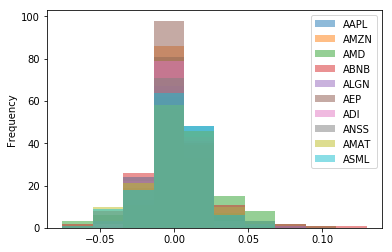

In [147]:
# Visualize the distribution of daily returns across all cryptos using a histogram plot
df_daily_returns_nasdaq.plot.hist(alpha=0.5)

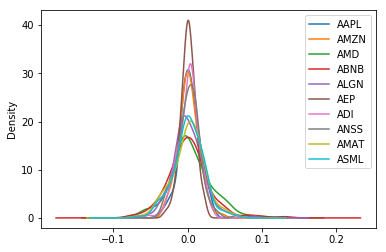

In [148]:
# Visualize the distribution of daily returns across all stocks using a density plot
df_daily_returns_nasdaq.plot.density()